# Exploratory Data Analysis - Pump it Up: Data Mining the Water Table

## Tabel of contents

1. Import Data
2. Data Analysis
3. Feature Engineering

## Introduction

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

Over 24 million people are impacted by the The United Republic of Tanzania’s water crisis; that’s almost half of the population of Tanzania

A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

The goal is to predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. 




## 1. Import Data
- import all the necessary classes, functions, and packages

In [1]:
#Import libraries

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import pickle

%matplotlib inline
plt.style.use('seaborn')

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Upload datasets
df_values = pd.read_csv('Water_Table_Training_set_values.csv')
df_labels = pd.read_csv('Water_Table_Training_set_labels.csv')

## 2. Data Analysis

In [3]:
# Check basic information about values dataset
df_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [4]:
# Check basic information about labels dataset
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [7]:
# Create summary of Nan and unique values counts and data types
X_info = pd.DataFrame(df_values.isna().sum(), columns=['NaN count'])

unique_val = []
types_val = []
zero_val = []

for column in df_values.columns:
    unique = len(df_values[column].unique())
    types = str(df_values[column].dtype)
    zeros = len(df_values[df_values[column]==0])
    
    unique_val.append(unique)
    types_val.append(types)
    zero_val.append(zeros)

X_info['Zero values count'] = zero_val
X_info['Unique_val count'] = unique_val
X_info['Data type'] = types_val

X_info.sort_values(by=['NaN count', 'Zero values count'], ascending=False)

,NaN count,Zero values count,Unique_val count,Data type
scheme_name,28166,0,2697,object
scheme_management,3877,0,13,object
installer,3655,0,2146,object
funder,3635,0,1898,object
public_meeting,3334,5055,3,object
permit,3056,17492,3,object
subvillage,371,0,19288,object
num_private,0,58643,65,int64
amount_tsh,0,41639,98,float64
population,0,21381,1049,int64


In [6]:
#Check if id columns in both datasets match
(df_values['id'] == df_labels['id']).sum()

59400

In [7]:
#Drop id column
X = df_values.drop('id', axis=1)
y = df_labels.drop('id', axis=1)

Text(0.5, 1.0, 'Price distribution')

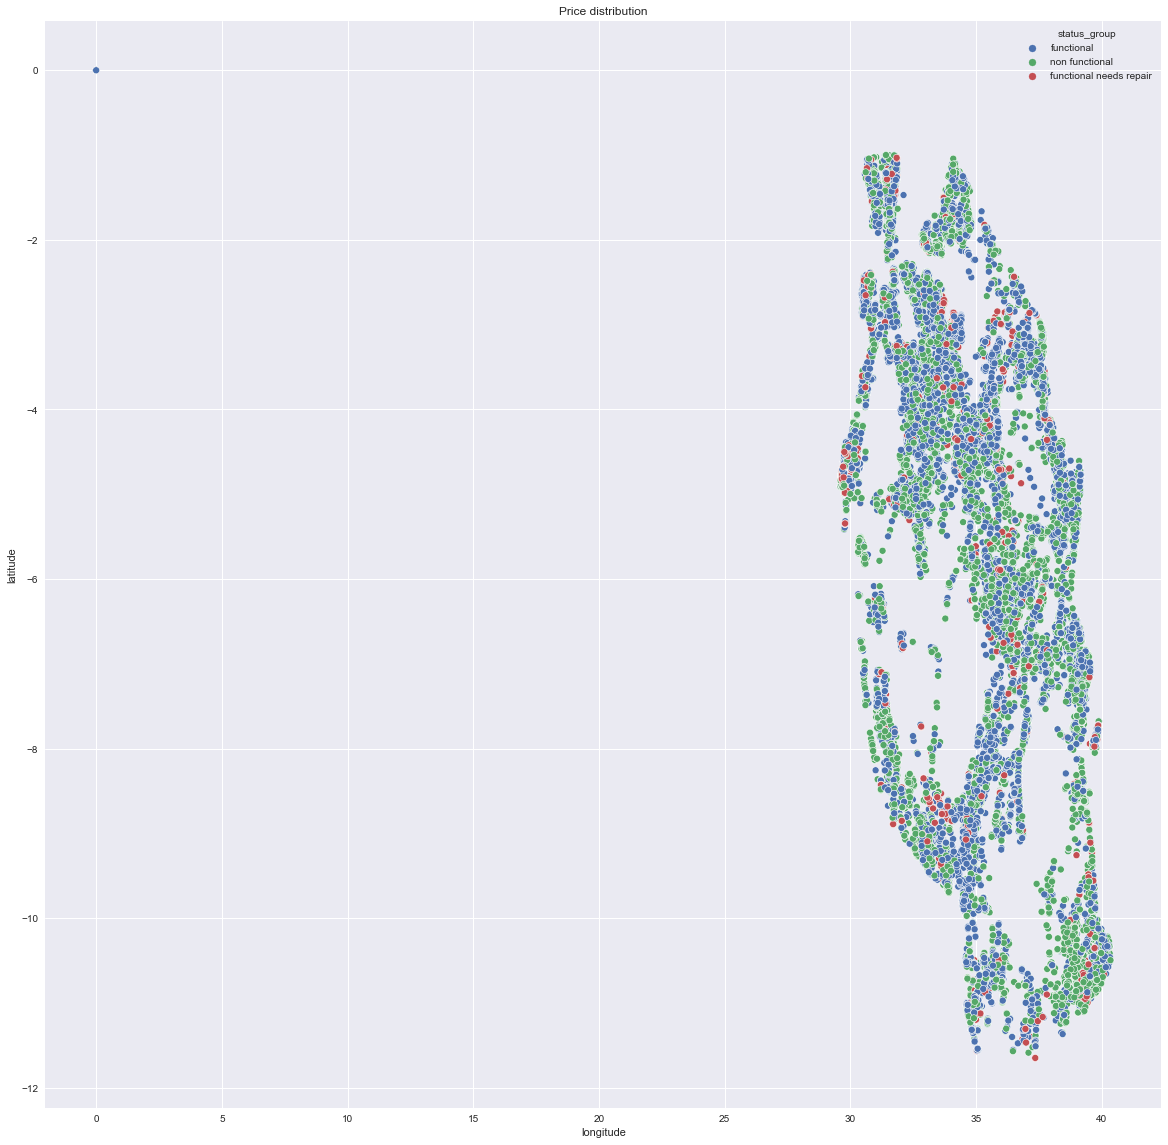

In [8]:
#Create scatter plot to vizualize GPS coordinates
plt.figure(figsize=(20,20))
ax = sns.scatterplot(data=X, 
                x='longitude', 
                y='latitude', 
                hue=y['status_group'])

ax.set_title('Price distribution')

In [9]:
#Check for miising GPS coordinates
missing_gps = X[X['longitude']==0]
missing_gps.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
21,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,...,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump
53,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
168,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,...,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
177,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
253,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


## 3. Data Engineering

### Fill out empty GPS coordinates

In [10]:
# Create a list of ward values for each inncorect gps coordinate row
ward_list = list(X[X['longitude']==0]['ward'].unique())

# Create a list with the ward values and new correct coordinates
gps_list1 = []

# Some ward values are also inncorect and can't have coordinates assigned by Geolocator. 
# If this case 0, 0 coordinates will be assigned

for ward in ward_list:
    try:
        address=ward
        geolocator = Nominatim(user_agent="Your_Name")
        location = geolocator.geocode(ward + ', Tanzania')
        gps_list1.append([ward, location.latitude, location.longitude])
        
    except AttributeError: 
        gps_list1.append([ward, 0, 0])

gps_list1

[['Ikungulyabashashi', -2.6154987, 33.9392423],
 ["Nyang'hwale", -3.3818183, 32.1112467],
 ['Chinamili', -2.8838455, 34.1768636],
 ['Bunamhala', -2.8707347, 34.0248122],
 ['Malili', -2.4454849, 33.8055692],
 ['Kalangalala', -2.8747658, 32.2301629],
 ['Shigala', -2.3921904, 33.6766328],
 ['Kasamwa', -2.8427991, 32.4235486],
 ['Zagayu', -2.94971815, 33.74153529519685],
 ['Nkungulu', -3.0070171, 33.4157514],
 ['Mwaubingi', 0, 0],
 ['Mhango', -2.75, 33.9166667],
 ['Nyaluhande', -2.5013382, 33.6107922],
 ['Nyakabindi', -2.651869, 33.978696],
 ['Dutwa', -2.5093101, 33.9686528],
 ['Kabita', -2.32762, 33.6465756],
 ['Nkololo', -2.6423973, 34.1600706],
 ['Gamboshi', 0, 0],
 ['Mwaswale', -2.819208, 34.3193193],
 ['Somanda', -3.3937158, 34.0150279],
 ['Katoro', -3.0048496, 31.927419],
 ['Lugulu', -3.2594213, 34.9247185],
 ['Kalemela', -4.5385852, 33.4498171],
 ['Sakwe', -2.7652258, 33.8579992],
 ['Busolwa', -3.0025795, 32.6312332],
 ['Kasoli', -2.5795663, 33.6780681],
 ['Lubanga', -2.6310997, 32.

In [11]:
# Check for gps coordinates for the values below
geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode('Nanyumbu, Tanzania')
print([location.latitude, location.longitude, location.altitude])

[-11.052345899999999, 38.386573885134695, 0.0]


In [12]:
#Manually replace a town which gps coordinated cound't be determioned by geolocator
gps_list1[61] = [gps_list1[61][0], -2.773186, 31.886058]
gps_list1[10] = [gps_list1[10][0], -2.475982, 34.1793023]
gps_list1[17] = [gps_list1[17][0], -2.6001279, 33.8422464]
gps_list1[37] = [gps_list1[37][0], -6.7900306, 39.2558001]
gps_list1[38] = [gps_list1[38][0], -6.7900306, 39.2558001]

# Final gpd coordinates list
gps_list1

[['Ikungulyabashashi', -2.6154987, 33.9392423],
 ["Nyang'hwale", -3.3818183, 32.1112467],
 ['Chinamili', -2.8838455, 34.1768636],
 ['Bunamhala', -2.8707347, 34.0248122],
 ['Malili', -2.4454849, 33.8055692],
 ['Kalangalala', -2.8747658, 32.2301629],
 ['Shigala', -2.3921904, 33.6766328],
 ['Kasamwa', -2.8427991, 32.4235486],
 ['Zagayu', -2.94971815, 33.74153529519685],
 ['Nkungulu', -3.0070171, 33.4157514],
 ['Mwaubingi', -2.475982, 34.1793023],
 ['Mhango', -2.75, 33.9166667],
 ['Nyaluhande', -2.5013382, 33.6107922],
 ['Nyakabindi', -2.651869, 33.978696],
 ['Dutwa', -2.5093101, 33.9686528],
 ['Kabita', -2.32762, 33.6465756],
 ['Nkololo', -2.6423973, 34.1600706],
 ['Gamboshi', -2.6001279, 33.8422464],
 ['Mwaswale', -2.819208, 34.3193193],
 ['Somanda', -3.3937158, 34.0150279],
 ['Katoro', -3.0048496, 31.927419],
 ['Lugulu', -3.2594213, 34.9247185],
 ['Kalemela', -4.5385852, 33.4498171],
 ['Sakwe', -2.7652258, 33.8579992],
 ['Busolwa', -3.0025795, 32.6312332],
 ['Kasoli', -2.5795663, 33.678

In [13]:
# Create two dictionaries with long and lat values for each ward
gps_list_long = {gps_list1[i][0]: (gps_list1[i][1]) for i in range(0, len(gps_list1))}
gps_list_lat = {gps_list1[i][0]: (gps_list1[i][2]) for i in range(0, len(gps_list1))}

In [14]:
# Replace longitude and latidute incorrect values with ward names
X['latitude'] = np.where(X['longitude'] == 0, X['ward'], X['latitude'])
X['longitude'] = np.where(X['longitude'] == 0, X['ward'], X['longitude'])

In [15]:
# Replace the ward names with coresponding gps coordinates
X = X.replace({"longitude": gps_list_long})
X = X.replace({"latitude": gps_list_lat})

Text(0.5, 1.0, 'Pumps locations')

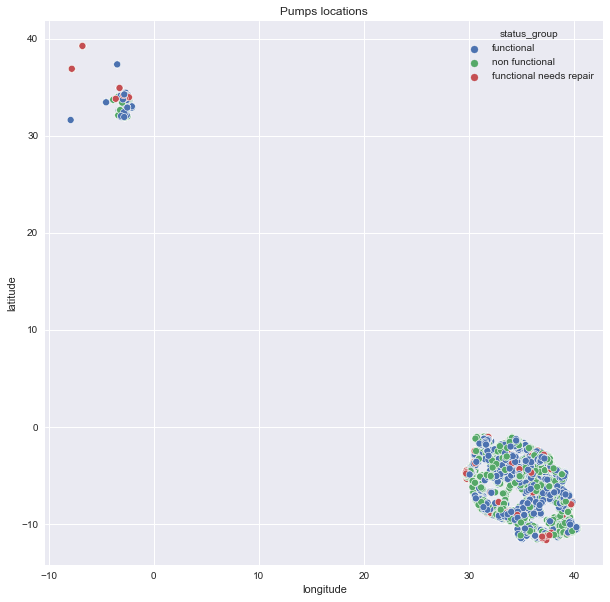

In [16]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=X, 
                x='longitude', 
                y='latitude', 
                hue=y['status_group'])

ax.set_title('Pumps locations')

In [17]:
# Check for incorrect gps values based on the scatter plot
# It seems that over 1800 rows have longitude and latitude columns values swapped
X[(X['latitude']>-0.98)|(X['latitude']<-11.7)] # latitude range for Tanzania

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
21,0.0,2013-02-10,Dwsp,0,DWE,-2.615499,33.939242,Muungano,0,Lake Victoria,...,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump
53,0.0,2011-08-01,Government Of Tanzania,0,Government,-3.381818,32.111247,Polisi,0,Lake Victoria,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
168,0.0,2013-01-30,Wvt,0,WVT,-2.883846,34.176864,Wvt Tanzania,0,Lake Victoria,...,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
177,0.0,2013-01-17,Netherlands,0,DWE,-2.870735,34.024812,Kikundi Cha Wakina Mama,0,Lake Victoria,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
253,0.0,2012-10-29,Hesawa,0,DWE,-2.445485,33.805569,Kwakisusi,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,0.0,2011-07-18,Dwsp,0,DWE,-3.618364,33.810536,Wazazo,0,Lake Victoria,...,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
59208,0.0,2013-01-22,Dwsp,0,DWE,-2.936123,33.744453,Mtakuja,0,Lake Victoria,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
59295,0.0,2011-07-19,Rwssp,0,DWE,-2.883846,34.176864,Maendeleo,0,Lake Victoria,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
59324,0.0,2013-01-22,World Vision,0,World Vision,-2.519616,32.907637,Mwazwilo,0,Lake Victoria,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [18]:
# Swap the longitude and latitude columns values in the selected rows
idx = ((X['latitude']>-0.98)|(X['latitude']<-11.7))
X.loc[idx,['latitude','longitude']] = X.loc[idx,['longitude','latitude']].values

In [19]:
X[(X['latitude']>-0.98)|(X['latitude']<-11.7)].head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group


Text(0.5, 1.0, 'Pumps locations')

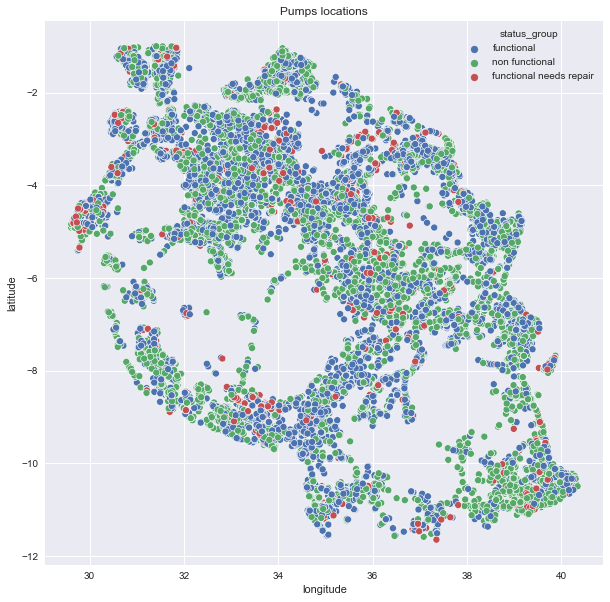

In [20]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=X, 
                x='longitude', 
                y='latitude', 
                hue=y['status_group'])

ax.set_title('Pumps locations')

In [21]:
# Check if there's any relation between construction_year and date_recorded
X[['construction_year', 'date_recorded']]

,construction_year,date_recorded
0,1999,2011-03-14
1,2010,2013-03-06
2,2009,2013-02-25
3,1986,2013-01-28
4,0,2011-07-13
...,...,...
59395,1999,2013-05-03
59396,1996,2011-05-07
59397,0,2011-04-11
59398,0,2011-03-08


In [29]:
with open('X_processed.pickle', 'wb') as f:
    pickle.dump(X, f, pickle.HIGHEST_PROTOCOL)

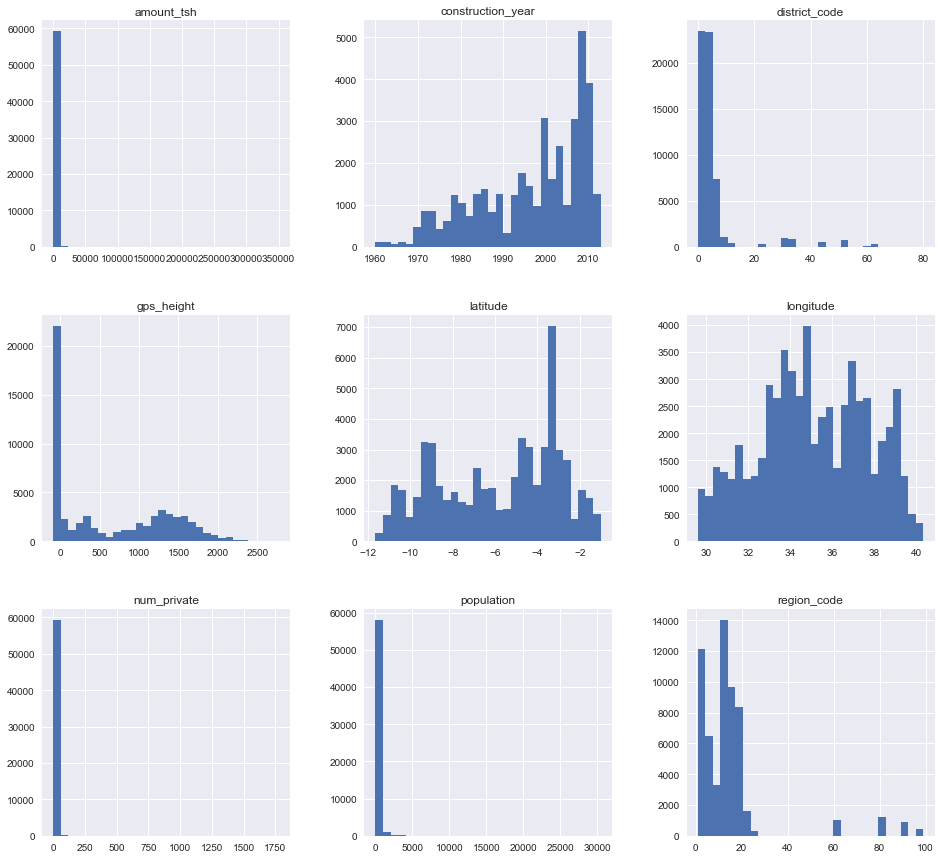

In [31]:
X.hist(figsize = (16,15), bins=30);

In [23]:
X.head().T

,0,1,2,3,4
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0
basin,Lake Nyasa,Lake Victoria,Pangani,Ruvuma / Southern Coast,Lake Victoria


### Relationship between construction_year and labels

In [25]:
# Concatenate predictor and label dataframes
df = pd.concat([X, y], axis=1)

In [26]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [31]:
# Create dataframe with constructon_year predictior, labels and counts
# create a group using groupby
group = df.groupby(['construction_year', 'status_group'])
  
# size of group to count observations
group = group['construction_year', 'status_group'].size()
  
# make a column name 
df_1 = group.reset_index(name='count')
df_1[df_1['construction_year']>=1960]

,construction_year,status_group,count
3,1960,functional,24
4,1960,functional needs repair,6
5,1960,non functional,72
6,1961,functional,2
7,1961,functional needs repair,3
...,...,...,...
159,2012,functional needs repair,51
160,2012,non functional,307
161,2013,functional,102
162,2013,functional needs repair,1


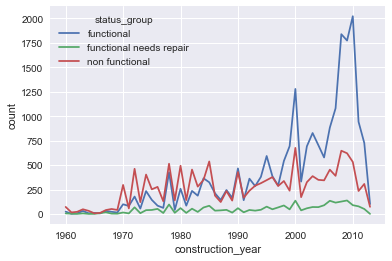

In [32]:
# Plot the results
sns.lineplot(data=df_1[df_1['construction_year']>=1960], x='construction_year', y='count', hue='status_group')